# Explore and clean dataset
Exploration of the Kaggle dataset [NBA Players stats since 1950](https://www.kaggle.com/drgilermo/nba-players-stats).

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Players dataset

In [2]:
players_df = pd.read_csv('../data/raw/Players.csv', header=0, index_col=0)
players_df.head()

,Player,height,weight,collage,born,birth_city,birth_state
id,,,,,,,
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
players_df.describe()

,height,weight,born
count,3921.000000,3921.000000,3921.00000
mean,198.704922,94.783219,1962.37975
std,9.269761,12.039515,20.33491
min,160.000000,60.000000,1913.00000
25%,190.000000,86.000000,1948.00000
50%,198.000000,95.000000,1964.00000
75%,206.000000,102.000000,1979.00000
max,231.000000,163.000000,1997.00000


In [4]:
players_df.isnull().sum()

Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [5]:
players_df.loc[players_df.isnull()['Player'],:]

,Player,height,weight,collage,born,birth_city,birth_state
id,,,,,,,
223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one player whose values are all null, so we will remove this player.

In [6]:
players_df.drop(223, axis=0, inplace=True)

In [7]:
players_df.nunique()

Player         3921
height           28
weight           76
collage         422
born             84
birth_city     1264
birth_state     128
dtype: int64

The player names are unique so we will use this as the index.

In [8]:
players_df.set_index('Player', inplace=True)
players_df.head()

,height,weight,collage,born,birth_city,birth_state
Player,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


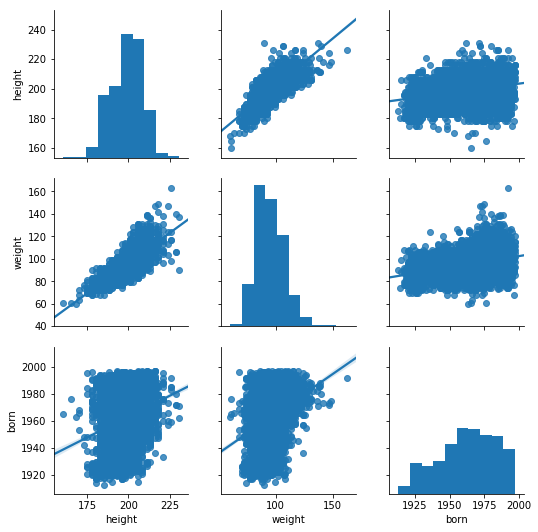

In [9]:
sns.pairplot(players_df, vars=['height', 'weight', 'born'], kind='reg')
plt.show()

## Season stats dataset

In [10]:
season_stats_df = pd.read_csv('../data/raw/Seasons_Stats.csv', header=0, index_col=0)
season_stats_df.head(20)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
id,,,,,,,,,,,,,,,,,,,,,
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0


In [11]:
season_stats_df.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


There are several rows with all null values, so we will remove these.

In [13]:
season_stats_df.dropna(how='all', inplace=True)

In [22]:
season_stats_df.isnull().sum()

Year          0
Player        0
Pos           0
Age           8
Tm            0
G             0
GS         6391
MP          486
PER         523
TS%          86
3PAr       5785
FTr          99
ORB%       3832
DRB%       3832
TRB%       3053
AST%       2069
STL%       3832
BLK%       3832
TOV%       5042
USG%       4984
blanl     24624
OWS          39
DWS          39
WS           39
WS/48       523
blank2    24624
OBPM       3827
DBPM       3827
BPM        3827
VORP       3827
FG            0
FGA           0
FG%          99
3P         5697
3PA        5697
3P%        9208
2P            0
2PA           0
2P%         128
eFG%         99
FT            0
FTA           0
FT%         858
ORB        3827
DRB        3827
TRB         312
AST           0
STL        3827
BLK        3827
TOV        4979
PF            0
PTS           0
dtype: int64

In [14]:
print('{no_rows} total rows'.format(no_rows=len(season_stats_df)))
print('{no_rows} unique combinations of Year, Player, Pos, and Tm'.format(no_rows=len(season_stats_df.groupby(['Year', 'Player', 'Pos', 'Tm']))))

24624 total rows
24624 unique combinations of Year, Player, Pos, and Tm


Each row is a unique combination of year, player, position, and team.

### Stats available
There are many columns in this dataset, whose meanings can be found [here](https://www.basketball-reference.com/about/glossary.html). In the first instance we will only consider stats available for all players when choosing our dream team. These are:

| Code   | Description   |
|:------ |:------------- |
| G      | Games |
| FG     | Field Goals (includes both 2-point field goals and 3-point field goals) |
| FGA    | Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts) |
| 2P     | 2-Point Field Goals |
| 2PA    | 2-Point Field Goal Attempts |
| FT     | Free Throws |
| FTA    | Free Throw Attempts |
| AST    | Assists |
| PF     | Personal Fouls |
| PTS    | Points |

Notice that some incomplete columns can be calculated from the complete columns:

* Field goal percentage (FG%) = FG / FGA.
* 2-point field goal percentage (2P%) = 2P / 2PA.
* 3-point field goals (3P) = FG - 2P.
* 3-point field goal attempts (3PA) = FGA - 2PA.
* 3-point field goal percentage (3P%) = 3P / 3PA.
* Free throw percentage (FT%) = FT / FTA.

Some other metrics potentially of interest are:

* Assists per game (APG) = AST / G.
* Points per game (PPG) = PTS / G.
* Personal fouls per game (PFPG) = PF / G.

We will go ahead and caculate these metrics.

In [35]:
season_stats_df['FG%'] = season_stats_df.loc[:, ['FG', 'FGA']].apply(lambda row: row['FG'] / row['FGA'] if row['FGA'] != 0 else 0, axis=1)
season_stats_df['2P%'] = season_stats_df.loc[:, ['2P', '2PA']].apply(lambda row: row['2P'] / row['2PA'] if row['2PA'] != 0 else 0, axis=1)
season_stats_df['3P'] = season_stats_df.loc[:, ['FG', '2P']].apply(lambda row: row['FG'] - row['2P'], axis=1)
season_stats_df['3PA'] = season_stats_df.loc[:, ['FGA', '2PA']].apply(lambda row: row['FGA'] - row['2PA'], axis=1)
season_stats_df['3P%'] = season_stats_df.loc[:, ['3P', '3PA']].apply(lambda row: row['3P'] / row['3PA'] if row['3PA'] != 0 else 0, axis=1)
season_stats_df['FT%'] = season_stats_df.loc[:, ['FT', 'FTA']].apply(lambda row: row['FT'] / row['FTA'] if row['FTA'] != 0 else 0, axis=1)
season_stats_df['APG'] = season_stats_df.loc[:, ['AST', 'G']].apply(lambda row: row['AST'] / row['G'] if row['G'] != 0 else 0, axis=1)
season_stats_df['PPG'] = season_stats_df.loc[:, ['PTS', 'G']].apply(lambda row: row['PTS'] / row['G'] if row['G'] != 0 else 0, axis=1)
season_stats_df['PFPG'] = season_stats_df.loc[:, ['PF', 'G']].apply(lambda row: row['PF'] / row['G'] if row['G'] != 0 else 0, axis=1)

We will also remove the non-complete columns.

In [38]:
season_stats_df.dropna(how='any', axis=1, inplace=True)

Furthermore, we only need to keep the relative metrics. For example, we only need FG%, not FG and FGA.

In [41]:
season_stats_df.drop(['FG', 'FGA', '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'AST', 'PF', 'PTS'], axis=1, inplace=True)

In [42]:
season_stats_df.head()

,Year,Player,Pos,Tm,G,FG%,3P%,2P%,FT%,APG,PPG,PFPG
id,,,,,,,,,,,,
0,1950.0,Curly Armstrong,"[PG, SG, SF, PF]",FTW,63.0,0.279070,0.0,0.279070,0.705394,2.793651,7.269841,3.444444
1,1950.0,Cliff Barker,[SG],INO,49.0,0.372263,0.0,0.372263,0.707547,2.224490,5.693878,2.020408
2,1950.0,Leo Barnhorst,[SF],CHS,67.0,0.348697,0.0,0.348697,0.697674,2.089552,6.537313,2.865672
3,1950.0,Ed Bartels,"[SF, PF]",TOT,15.0,0.255814,0.0,0.255814,0.558824,1.333333,4.200000,1.933333
4,1950.0,Ed Bartels,"[SF, PF]",DNN,13.0,0.256098,0.0,0.256098,0.548387,1.538462,4.538462,2.076923


### Player positions
There are five primary positions in basketball:

* Point guard (PG)
* Shooting guard (SG)
* Small forward (SF)
* Power forward (PF)
* Centre (C)

However, there are many different positions values in the dataset, all of which are combinations of the above five positions.

In [15]:
season_stats_df['Pos'].unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
       'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'], dtype=object)

We will create a mapping from the positions in the dataset to the default five. Each player has potentially played in multiple positions throughout their career. For the puposes of choosing a dream team, we will say a player is eligible for a position if they have played there at least once.

In [16]:
position_mapping = {
    'G-F': ['PG', 'SG', 'SF', 'PF'],
    'F': ['SF', 'PF'],
    'G': ['PG', 'SG'],
    'F-C': ['SF', 'PF', 'C'],
    'F-G': ['PG', 'SG', 'SF', 'PF'],
    'C-F': ['SF', 'PF', 'C'],
    'PF-C': ['PF', 'C'],
    'SF-SG': ['SF', 'SG'],
    'C-PF': ['PF', 'C'],
    'SG-SF': ['SF', 'SG'],
    'PF-SF': ['PF', 'SF'],
    'SF-PF': ['SF', 'PF'],
    'SG-PG': ['SG', 'PG'],
    'SF-PG': ['SF', 'PG'],
    'C-SF': ['C', 'SF'],
    'PG-SG': ['PG', 'SG'],
    'PG-SF': ['PG', 'SF'],
    'SG-PF': ['SG', 'PF']
}

season_stats_df['Pos'] = season_stats_df['Pos'].apply(lambda pos: position_mapping[pos] if pos in position_mapping else [pos])

Next we will determine the positions each player has played and add that information to the players data frame.

In [17]:
players_df['Pos'] = season_stats_df.groupby('Player')['Pos'].apply(lambda df: list(set([val for sublist in df.values for val in sublist])))

players_df.head()

,height,weight,collage,born,birth_city,birth_state,Pos
Player,,,,,,,
Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,"[SG, PG, PF, SF]"
Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,[SG]
Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN,"[SG, PG, PF, SF]"
Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN,"[PF, SF]"
Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky,"[SG, PG]"
